In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers pandas
import pandas as pd
from transformers import pipeline

In [14]:
# Models:
    # mdhugol/indonesia-bert-sentiment-classification
    # w11wo/indonesian-roberta-base-sentiment-classifier
    # StevenRiyaldi/Indonesia-Pemilu-Sentiment-Classification

data = pd.read_csv('/content/drive/MyDrive/IR - Sentiment Analysis/data/preprocessed_data_full.csv')
data['final_cleaned_text'] = data['final_cleaned_text'].astype(str)

# Load the pre-trained models
indonlu_model = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")
indobert_model = pipeline("sentiment-analysis", model="mdhugol/indonesia-bert-sentiment-classification")
bert_pemilu_model = pipeline("sentiment-analysis", model="StevenRiyaldi/Indonesia-Pemilu-Sentiment-Classification")

def map_bert_labels(label):
    if label == 'LABEL_0':
        return 'Positive'
    elif label == 'LABEL_1':
        return 'Neutral'
    elif label == 'LABEL_2':
        return 'Negative'

data['indonlu_sentiment'] = data['final_cleaned_text'].apply(lambda x: indonlu_model(x)[0]['label'].capitalize()) 
data['indobert_sentiment'] = data['final_cleaned_text'].apply(lambda x: map_bert_labels(bert_model(x)[0]['label']))
data['bert_pemilu_sentiment'] = data['final_cleaned_text'].apply(lambda x: map_bert_labels(bert_pemilu_model(x)[0]['label']))

data.to_csv('/content/drive/MyDrive/IR - Sentiment Analysis/NEW_labeled_data_with_indonlu_indobert_bertpemilu.csv', index=False)

print("Sentiment labeling completed. Results saved as 'NEW_labeled_data_with_indonlu_indobert_bertpemilu.csv'")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Sentiment labeling completed. Results saved as 'NEW_labeled_data_with_indonlu_indobert_bertpemilu.csv'


## Result Analysis

In [20]:
data = pd.read_csv('/content/drive/MyDrive/IR - Sentiment Analysis/NEW_labeled_data_with_indonlu_indobert_bertpemilu.csv')

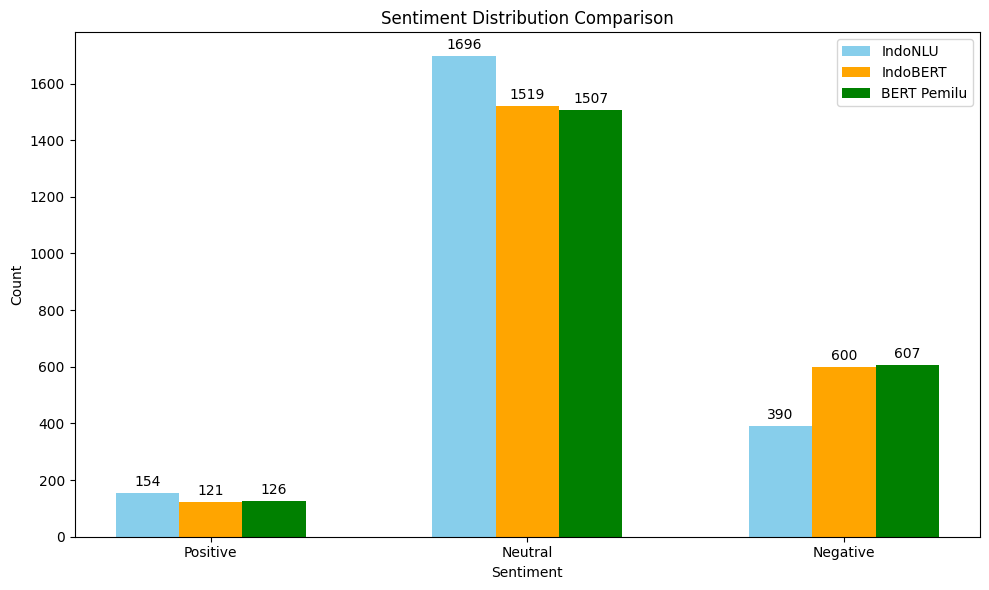

In [21]:
# Sentiment Distribution Comparison

import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of each sentiment for each model
distribution_indonlu = data['indonlu_sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)
distribution_indobert = data['indobert_sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)
distribution_bertpemilu = data['bert_pemilu_sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)

labels = ['Positive', 'Neutral', 'Negative']
x = np.arange(len(labels))
width = 0.2  

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, distribution_indonlu, width, label='IndoNLU', color='skyblue')
bar2 = ax.bar(x, distribution_indobert, width, label='IndoBERT', color='orange')
bar3 = ax.bar(x + width, distribution_bertpemilu, width, label='BERT Pemilu', color='green')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Distribution Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()
plt.show()


<ipython-input-22-39c75771c892>:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trend_indonlu = data.groupby([data['created_at'].dt.to_period('M')])['indonlu_sentiment'].value_counts().unstack().fillna(0)
<ipython-input-22-39c75771c892>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trend_indobert = data.groupby([data['created_at'].dt.to_period('M')])['indobert_sentiment'].value_counts().unstack().fillna(0)
<ipython-input-22-39c75771c892>:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trend_bertpemilu = data.groupby([data['created_at'].dt.to_period('M')])['bert_pemilu_sentiment'].value_counts().unstack().fillna(0)


<Figure size 1000x600 with 0 Axes>

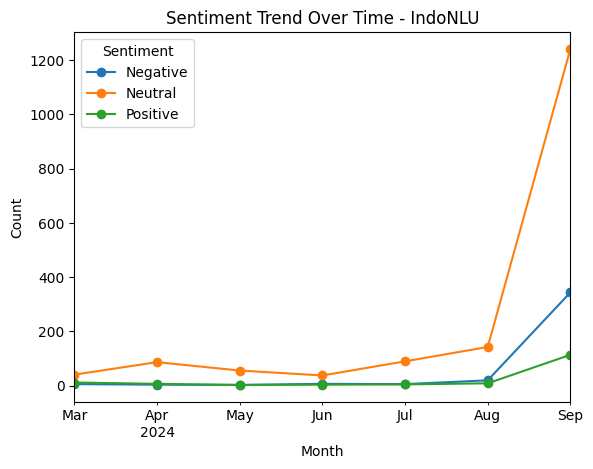

<Figure size 1000x600 with 0 Axes>

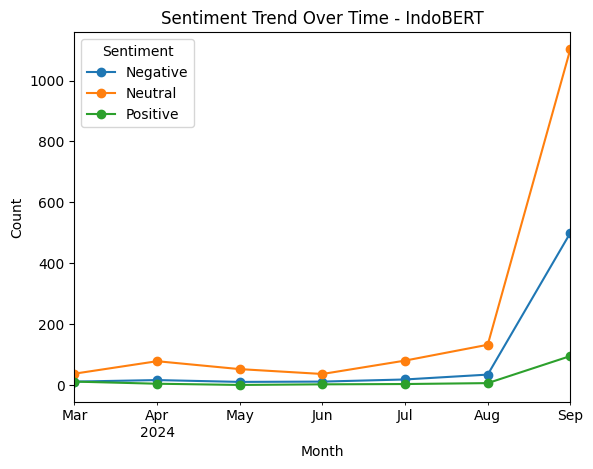

<Figure size 1000x600 with 0 Axes>

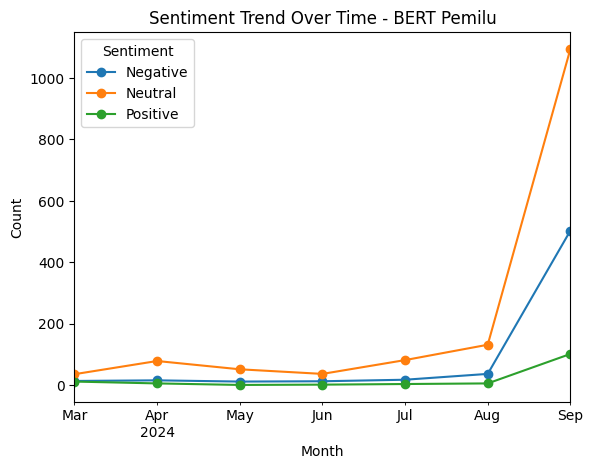

In [22]:
# Sentiment Trend Over Time

import matplotlib.pyplot as plt
import pandas as pd


data['created_at'] = pd.to_datetime(data['created_at'], format='%a %b %d %H:%M:%S %z %Y')

trend_indonlu = data.groupby([data['created_at'].dt.to_period('M')])['indonlu_sentiment'].value_counts().unstack().fillna(0)
trend_indobert = data.groupby([data['created_at'].dt.to_period('M')])['indobert_sentiment'].value_counts().unstack().fillna(0)
trend_bertpemilu = data.groupby([data['created_at'].dt.to_period('M')])['bert_pemilu_sentiment'].value_counts().unstack().fillna(0)

# Plot sentiment trend for model 1
plt.figure(figsize=(10, 6))
trend_indonlu.plot(kind='line', marker='o', title="Sentiment Trend Over Time - IndoNLU", xlabel='Month', ylabel='Count')
plt.legend(title='Sentiment')
plt.show()

# Plot sentiment trend for model 2
plt.figure(figsize=(10, 6))
trend_indobert.plot(kind='line', marker='o', title="Sentiment Trend Over Time - IndoBERT", xlabel='Month', ylabel='Count')
plt.legend(title='Sentiment')
plt.show()

# Plot sentiment trend for model 3
plt.figure(figsize=(10, 6))
trend_bertpemilu.plot(kind='line', marker='o', title="Sentiment Trend Over Time - BERT Pemilu", xlabel='Month', ylabel='Count')
plt.legend(title='Sentiment')
plt.show()

In [24]:
# Agreement Between Models

# Identify tweets where all models agree on the same sentiment
agreement = data[(data['indonlu_sentiment'] == data['indobert_sentiment']) &
                 (data['indobert_sentiment'] == data['bert_pemilu_sentiment'])]

# Count the number of agreements
agreement_count = agreement.shape[0]
total_tweets = data.shape[0]
agreement_percentage = (agreement_count / total_tweets) * 100

print(f"Number of tweets where all models agree: {agreement_count}")
print(f"Percentage of agreement among models: {agreement_percentage:.2f}%")

agreement.to_csv('/content/drive/MyDrive/IR - Sentiment Analysis/agreement_sentiment.csv', index=False)
agreement[['final_cleaned_text', 'indonlu_sentiment']].head(10)


Number of tweets where all models agree: 1841
Percentage of agreement among models: 82.19%


,final_cleaned_text,indonlu_sentiment
0,jelang lantik presiden 20 oktober 2024 pks dek...,Neutral
1,orang aju mohon uji materi mahkamah konstitusi...,Neutral
2,presiden joko widodo lantik politikus partai g...,Neutral
3,indonesia kebal resesi 2024 prabowo optimis je...,Neutral
4,menko marves luhut binsar pandjaitan cerita pr...,Neutral
6,celah tunda batal lantik prabowo gibran milu 2...,Neutral
7,prabowo gibran batal lantik mpr ketua mpr bamb...,Neutral
8,selamat pilih prabowo subianto gibran rakabumi...,Neutral
9,selamat mas tetap menang pilih presiden wakil ...,Positive
10,analisis sukses tidak lantik presiden prabowo ...,Neutral


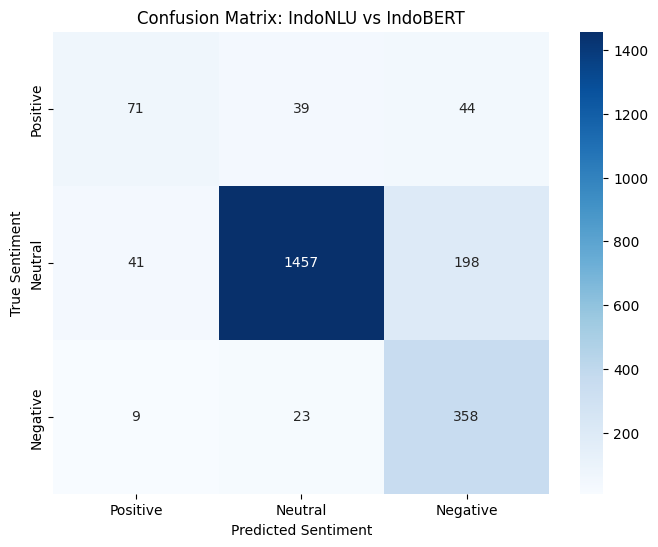

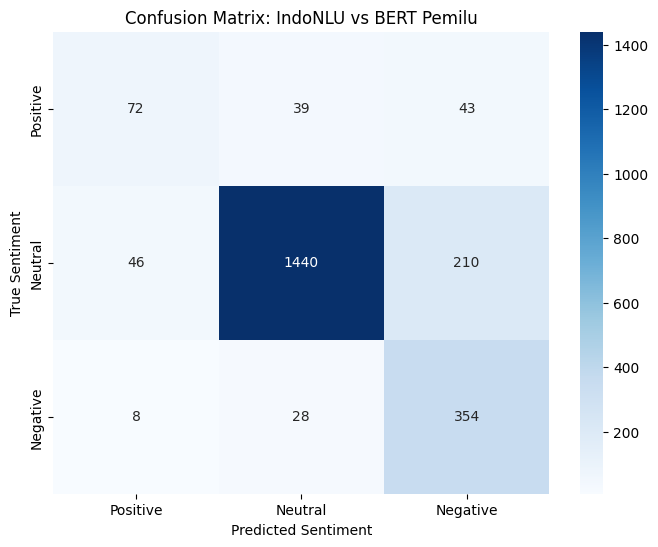

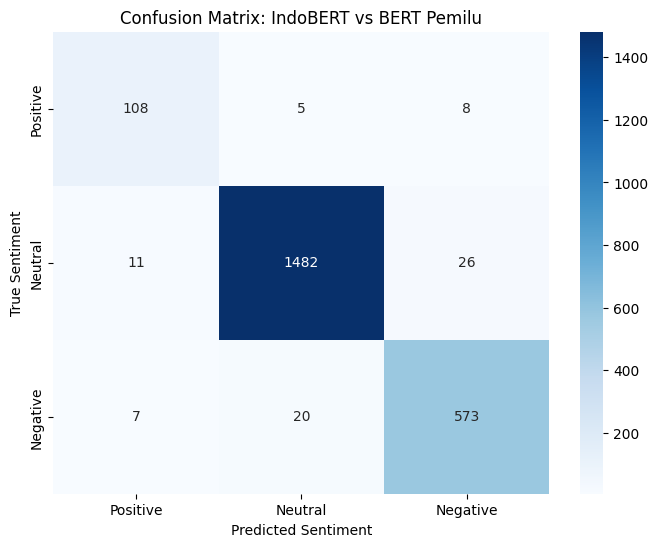

In [25]:
# Sentiment Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["Positive", "Neutral", "Negative"])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted Sentiment')
    plt.ylabel('True Sentiment')
    plt.show()

# Confusion Matrix: IndoNLU vs IndoBERT
plot_confusion_matrix(data['indonlu_sentiment'], data['indobert_sentiment'], title="IndoNLU vs IndoBERT")

# Confusion Matrix: IndoNLU vs BERT Pemilu
plot_confusion_matrix(data['indonlu_sentiment'], data['bert_pemilu_sentiment'], title="IndoNLU vs BERT Pemilu")

# Confusion Matrix: IndoBERT vs BERT Pemilu
plot_confusion_matrix(data['indobert_sentiment'], data['bert_pemilu_sentiment'], title="IndoBERT vs BERT Pemilu")



Sentiment analysis for keyword: prabowo


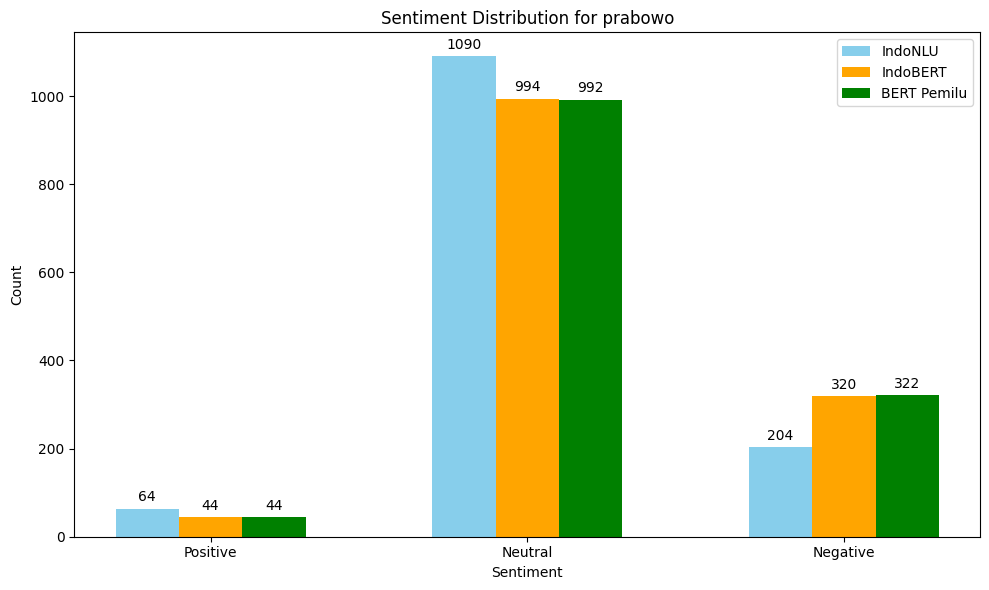


Sentiment analysis for keyword: gibran


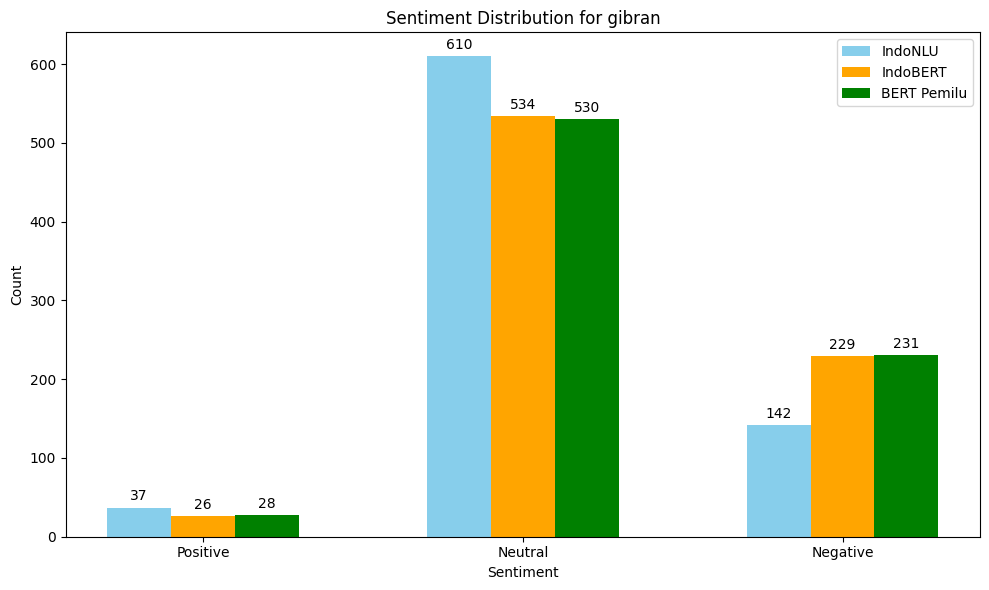

In [33]:
#Sentiment Analysis on Key Terms/Topics

import numpy as np

# Define a list of key terms or topics for analysis
keywords = ['prabowo', 'gibran']

# Loop through each keyword and analyze the sentiment distribution
for keyword in keywords:
    print(f"\nSentiment analysis for keyword: {keyword}")

    keyword_data = data[data['final_cleaned_text'].str.contains(keyword, case=False, na=False)]

    indonlu_counts = keyword_data['indonlu_sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)
    indobert_counts = keyword_data['indobert_sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)
    bertpemilu_counts = keyword_data['bert_pemilu_sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)

    labels = ['Positive', 'Neutral', 'Negative']
    x = np.arange(len(labels))
    width = 0.2 

    # Create a grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bar1 = ax.bar(x - width, indonlu_counts, width, label='IndoNLU', color='skyblue')
    bar2 = ax.bar(x, indobert_counts, width, label='IndoBERT', color='orange')
    bar3 = ax.bar(x + width, bertpemilu_counts, width, label='BERT Pemilu', color='green')

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')
    ax.set_title(f'Sentiment Distribution for {keyword}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_labels(bar1)
    add_labels(bar2)
    add_labels(bar3)

    plt.tight_layout()
    plt.show()



Generating word cloud for Positive sentiment using indonlu_sentiment


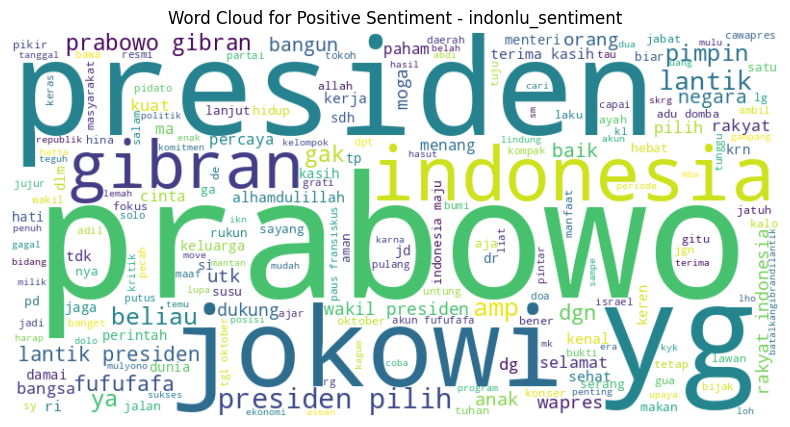


Generating word cloud for Neutral sentiment using indonlu_sentiment


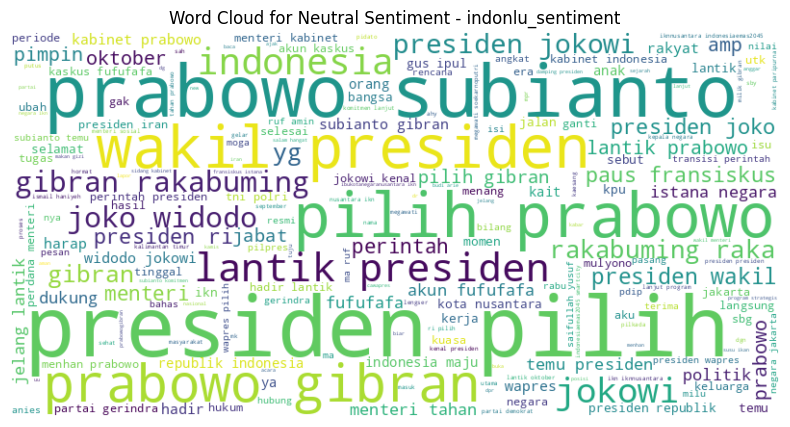


Generating word cloud for Negative sentiment using indonlu_sentiment


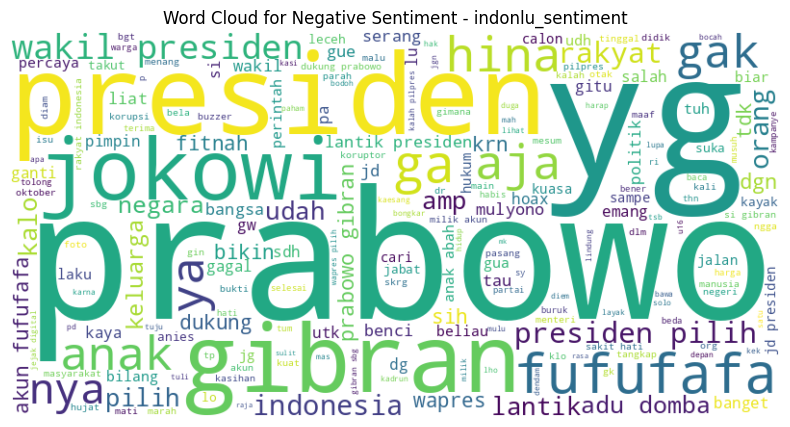


Generating word cloud for Positive sentiment using indobert_sentiment


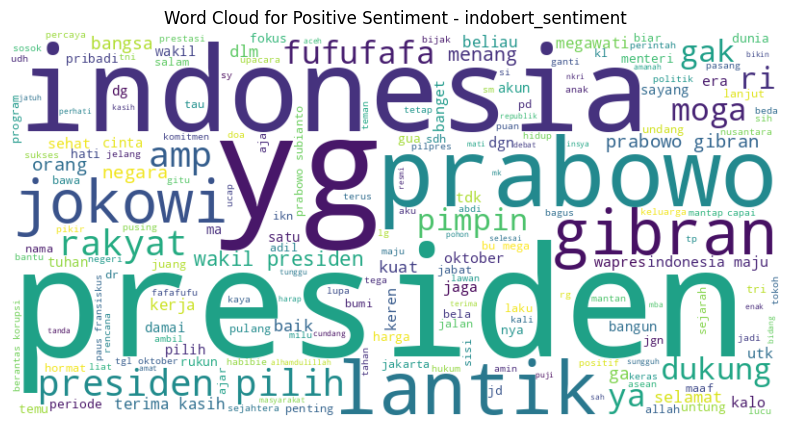


Generating word cloud for Neutral sentiment using indobert_sentiment


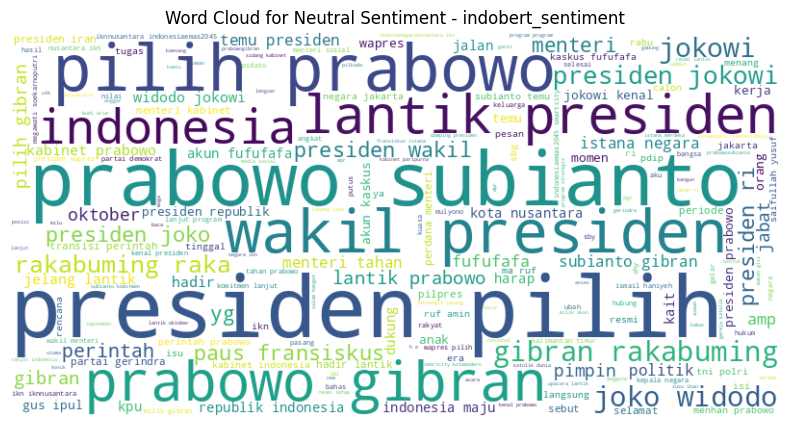


Generating word cloud for Negative sentiment using indobert_sentiment


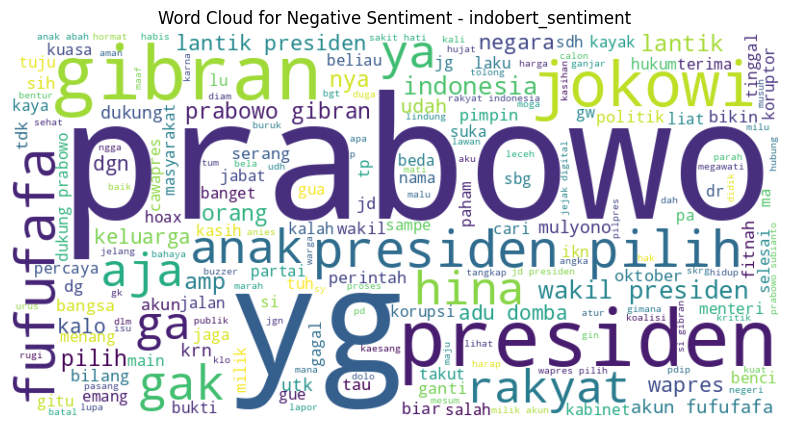


Generating word cloud for Positive sentiment using bert_pemilu_sentiment


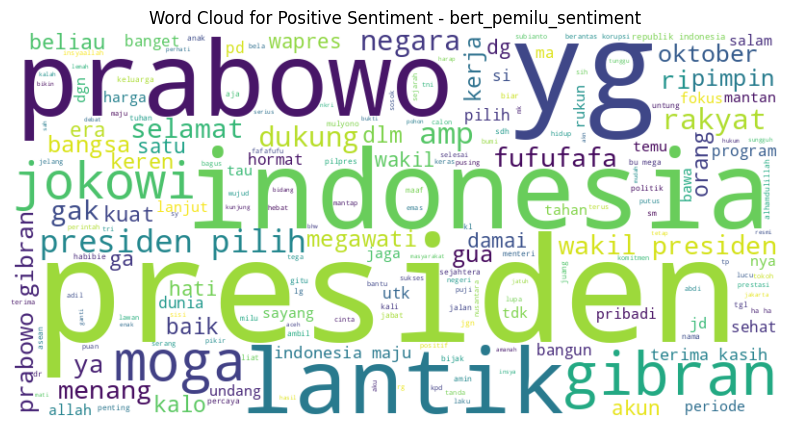


Generating word cloud for Neutral sentiment using bert_pemilu_sentiment


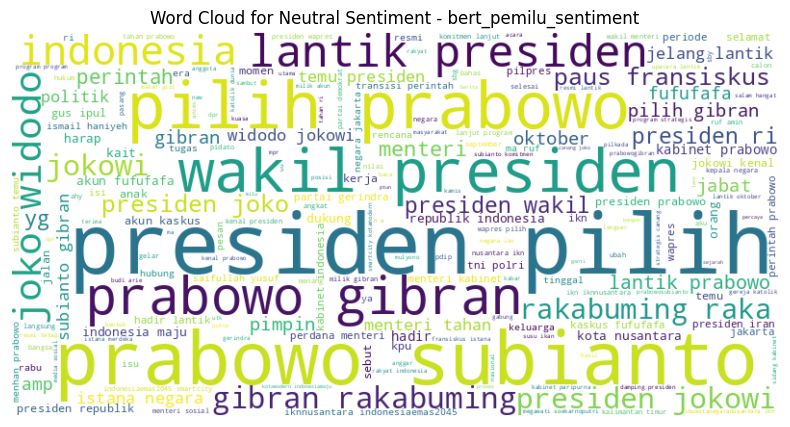


Generating word cloud for Negative sentiment using bert_pemilu_sentiment


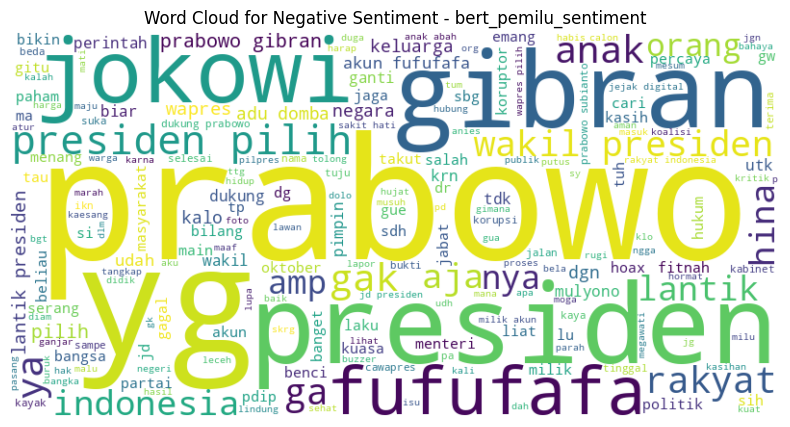

In [36]:
# Word Cloud based on Sentiment

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(data, sentiment, model_name):
    filtered_data = data[(data[model_name] == sentiment) & (data['final_cleaned_text'].notna())]
    filtered_data = filtered_data[filtered_data['final_cleaned_text'].apply(lambda x: isinstance(x, str))]

    text = ' '.join(filtered_data['final_cleaned_text'])

    if text.strip(): 
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment} Sentiment - {model_name}')
        plt.show()
    else:
        print(f"No valid text found for {sentiment} sentiment using {model_name}")

models = ['indonlu_sentiment', 'indobert_sentiment', 'bert_pemilu_sentiment']

for model in models:
    for sentiment in ['Positive', 'Neutral', 'Negative']:
        print(f"\nGenerating word cloud for {sentiment} sentiment using {model}")
        generate_wordcloud(data, sentiment, model)
